In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.power import TTestIndPower
from statsmodels.api import qqplot

%matplotlib inline

## データ準備

In [3]:
# データのロード
df = sns.load_dataset('tips')
# チップ率を計算
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 分布の描画

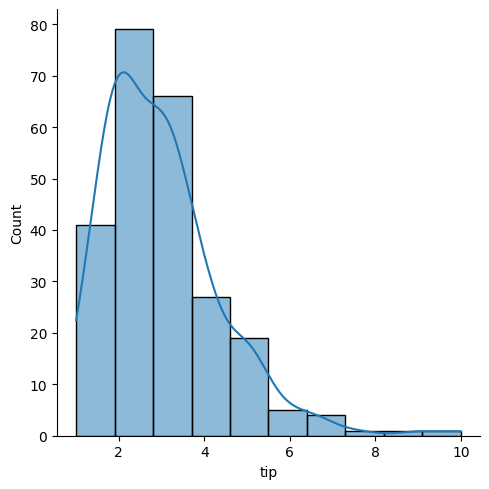

In [3]:
sns.displot(df['tip'], kde=True, bins=10)

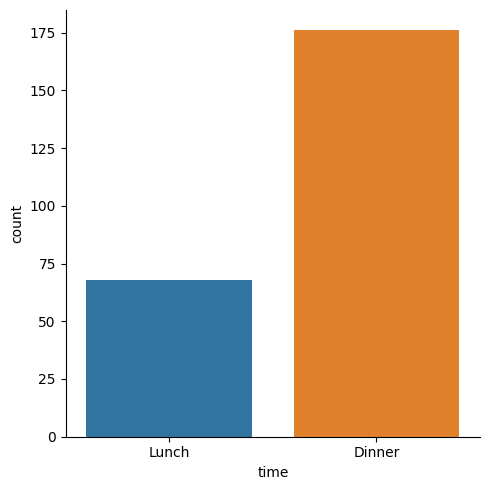

In [4]:
sns.catplot(x='time', data=df , kind='count')

### 平均値

In [5]:
np.mean(df['tip_rate'])

0.16080258172250472

In [8]:
df['tip_rate'].mean()

0.16080258172250472

In [53]:
df.groupby('sex').mean(numeric_only=True)['tip_rate']

sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64

In [54]:
df.groupby('sex').mean(numeric_only=True)

,total_bill,tip,size,tip_rate
sex,,,,
Male,20.744076,3.089618,2.630573,0.157651
Female,18.056897,2.833448,2.459770,0.166491


<Axes: xlabel='sex', ylabel='tip_rate'>

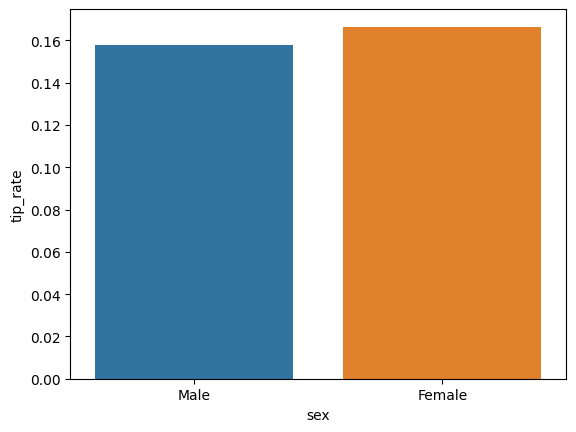

In [6]:
sns.barplot(x='sex', y='tip_rate', data=df, errorbar=None)

<Axes: xlabel='sex'>

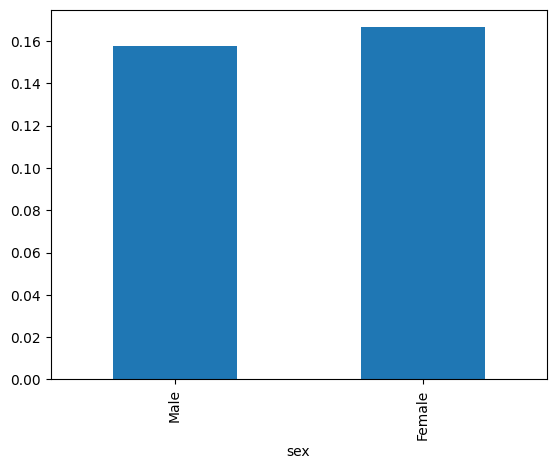

In [21]:
df.groupby('sex').mean(numeric_only=True)['tip_rate'].plot(kind='bar')

## 中央値

In [11]:
np.median(df['tip_rate'])

0.15476977125802577

In [14]:
df['tip_rate'].median()

0.15476977125802577

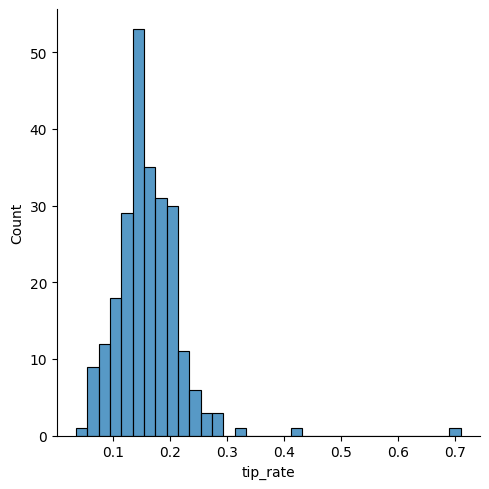

In [24]:
sns.displot(df['tip_rate'], kde=False)

In [22]:
df.groupby('sex').median(numeric_only=True)

,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2.0,0.153492
Female,16.40,2.75,2.0,0.155581


<Axes: xlabel='sex', ylabel='tip_rate'>

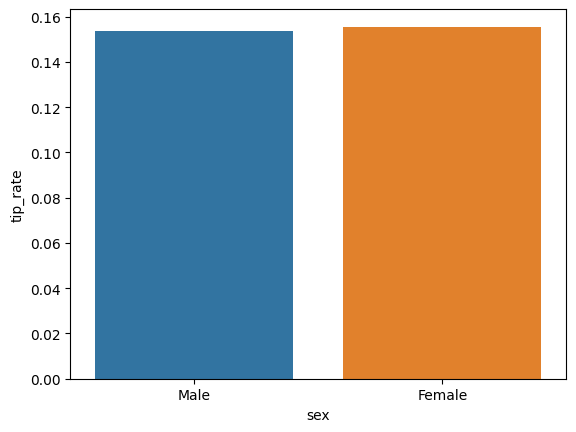

In [26]:
sns.barplot(x='sex', y='tip_rate', data=df, estimator=np.median, errorbar=None)

In [27]:
df.sort_values('tip_rate', ascending=True)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
237,32.83,1.17,Male,Yes,Sat,Dinner,2,0.035638
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
...,...,...,...,...,...,...,...,...
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667


## 最頻値

In [31]:
mode, count = stats.mode(df)

C:\Users\tiglz\AppData\Local\Temp\ipykernel_7636\3855105828.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, count = stats.mode(df)
C:\Users\tiglz\AppData\Local\Temp\ipykernel_7636\3855105828.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode, count = stats.mode(df)


In [33]:
# 戻り値はリスト
print(mode)
print(count)

[[13.42 2.0 'Male' 'No' 'Sat' 'Dinner' 2 0.1448225923244026]]
[[  3  33 157 151  87 176 156   2]]


In [35]:
# チップ率の最頻値は二つある
df['tip_rate'].mode()

0    0.144823
1    0.153846
Name: tip_rate, dtype: float64

In [39]:
# 最新の方法
df.mode()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,13.42,2.0,Male,No,Sat,Dinner,2.0,0.144823
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153846


## 範囲

In [40]:
# 最小値
np.min(df['tip'])

1.0

In [59]:
df['tip'].min()

1.0

In [44]:
df.groupby('sex').min(numeric_only=True)

,total_bill,tip,size,tip_rate
sex,,,,
Male,7.25,1.0,1,0.035638
Female,3.07,1.0,1,0.056433


In [45]:
# 最大値
np.max(df['tip'])

10.0

In [46]:
df['tip'].max()

10.0

In [48]:
df.groupby('sex').max(numeric_only=True)

,total_bill,tip,size,tip_rate
sex,,,,
Male,50.81,10.0,6,0.710345
Female,44.30,6.5,6,0.416667


In [49]:
# 範囲: 最大値 - 最小値
df['tip'].max() - df['tip'].min()

9.0

## 四分位数

In [50]:
# 任意の分位数を求める
np.quantile(df['tip_rate'], [0.25, 0.5, 0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [51]:
df['tip_rate'].quantile([0.25, 0.5, 0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [52]:
# IQR: 四分位範囲
stats.iqr(df['tip_rate'])

0.06234812458689151

In [53]:
# Q3 - Q1がIQRと同じであることを確認
0.191475 - 0.129127

0.062348000000000015

In [54]:
# QD: 四分位偏差(IQR/2)
stats.iqr(df['tip_rate']) / 2

0.031174062293445756

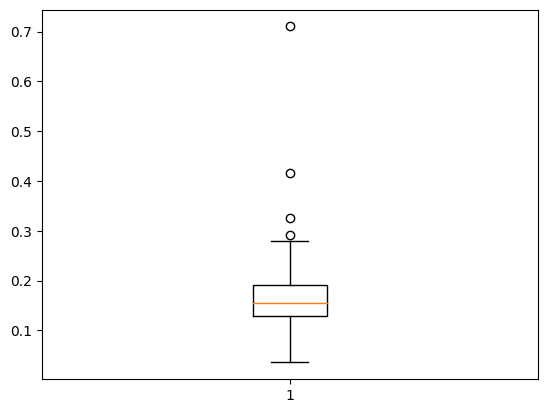

In [55]:
# 箱ひげ図
plt.boxplot(df['tip_rate'])
plt.show()

<Axes: xlabel='sex', ylabel='tip_rate'>

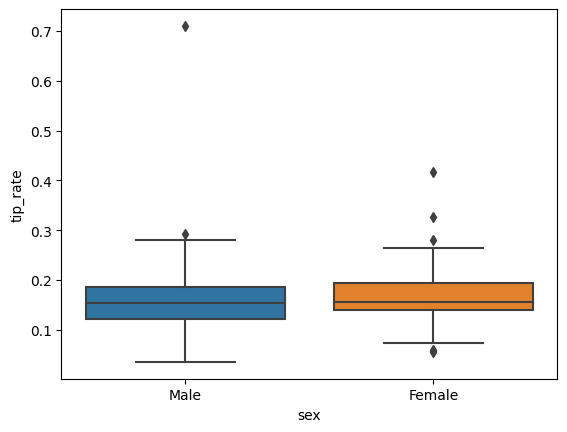

In [65]:
sns.boxplot(x='sex', y='tip_rate', data=df)

## 分散

In [67]:
np.var(df['tip'])

1.9066085124966412

## 標準偏差

In [68]:
np.std(df['tip'])

1.3807999538298954

In [69]:
# 分散の平方根が標準偏差であることを確認
np.sqrt(np.var(df['tip']))

1.3807999538298954

## まとめ

In [64]:
# 統計量の一括出力
df.describe()

,total_bill,tip,size,tip_rate
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


In [67]:
df.groupby('sex').describe().T

sex                     Male     Female
total_bill count  157.000000  87.000000
           mean    20.744076  18.056897
           std      9.246469   8.009209
           min      7.250000   3.070000
           25%     14.000000  12.750000
           50%     18.350000  16.400000
           75%     24.710000  21.520000
           max     50.810000  44.300000
tip        count  157.000000  87.000000
           mean     3.089618   2.833448
           std      1.489102   1.159495
           min      1.000000   1.000000
           25%      2.000000   2.000000
           50%      3.000000   2.750000
           75%      3.760000   3.500000
           max     10.000000   6.500000
size       count  157.000000  87.000000
           mean     2.630573   2.459770
           std      0.955997   0.937644
           min      1.000000   1.000000
           25%      2.000000   2.000000
           50%      2.000000   2.000000
           75%      3.000000   3.000000
           max      6.000000   6.000000
tip_rate   count  157.000000  87.000000
           mean     0.157651   0.166491
           std      0.064778   0.053632
           min      0.035638   0.056433
           25%      0.121389   0.140416
           50%      0.153492   0.155581
           75%      0.186240   0.194266
           max      0.710345   0.416667

## 共分散

In [77]:
# 分散共分散行列 biasは不偏分散を使うかどうか
np.cov(df['total_bill'], df['tip'], bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

In [88]:
# np.stackで行列を作成
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)
np.cov(x, bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

In [90]:
# df.cov()は不偏共分散行列を返す(nではなくn-1で割った時の分散と共分散であることに注意)
df.cov(numeric_only=True, ddof=0)

,total_bill,tip,size,tip_rate
total_bill,78.928131,8.289389,5.045221,-0.183352
tip,8.289389,1.906609,0.641267,0.028812
size,5.045221,0.641267,0.900883,-0.008264
tip_rate,-0.183352,0.028812,-0.008264,0.003715


## 相関係数

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

In [98]:
# 相関行列
np.corrcoef(df['total_bill'], df['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [97]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)
np.corrcoef(x)

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

In [96]:
df.corr(numeric_only=True)

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


<Axes: >

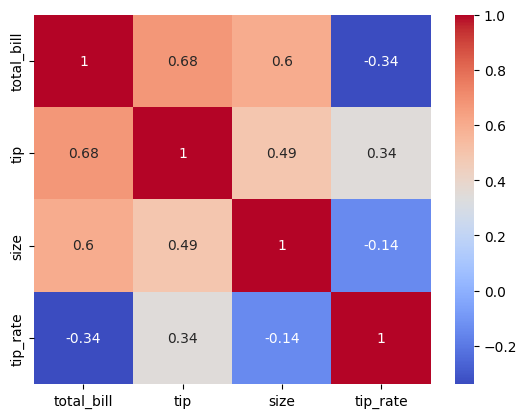

In [100]:
# 相関行列をheatmapを使って表示
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)

## 連関

In [102]:
# 分割表
pd.crosstab(df['sex'], df['time'])

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [106]:
cont_table = pd.crosstab(df['sex'], df['time'])
# 第一戻り値がカイ二乗, 第四戻り値が期待度数
stats.chi2_contingency(cont_table, correction=False)

Chi2ContingencyResult(statistic=10.277251918677742, pvalue=0.0013468039268008764, dof=1, expected_freq=array([[ 43.75409836, 113.24590164],
       [ 24.24590164,  62.75409836]]))

In [110]:
# GPT4
cont_table = pd.crosstab(df['sex'], df['time'])

chi2, p, _, expected = stats.chi2_contingency(cont_table, correction=False)

print("カイ二乗値: ", chi2)
print("p値: ", p)
print("期待度数: \n", expected)

# p値に基づく解釈
alpha = 0.05
if p < alpha:
    print("2つのカテゴリ変数は独立ではないと結論されます（有意水準 {}）。".format(alpha))
else:
    print("2つのカテゴリ変数は独立と結論されます（有意水準 {}）。".format(alpha))


カイ二乗値:  10.277251918677742
p値:  0.0013468039268008764
期待度数: 
 [[ 43.75409836 113.24590164]
 [ 24.24590164  62.75409836]]
2つのカテゴリ変数は独立ではないと結論されます（有意水準 0.05）。


## クラメールの連関係数

In [111]:
def cramers_v(x, y):
    cont_table = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(cont_table, correction=False)[0]
    min_d = min(cont_table.shape) - 1
    n = len(x)
    v = np.sqrt(chi2/(min_d*n))
    return v

In [112]:
cramers_v(df['sex'], df['time'])

0.20523129613344476

## 確率分布

In [122]:
# random variates(rvs): 確率変量
# 離散型一様分布
stats.randint.rvs(1, 7)

6

In [75]:
# 連続型一様分布
stats.uniform(0, 1).rvs()

0.6653259640704186

## 確率分布の描画

In [129]:
# サンプル関数
def simple_func(x):
    return x**2 + 3
simple_func(10)

103

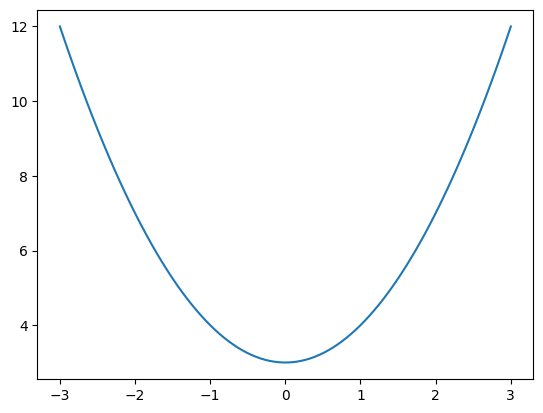

In [137]:
# 連続したx軸の値を作成
x = np.linspace(-3, 3, 100)
# 整数のみのx軸の値を作成
# x = np.arange(-3, 4)
y = simple_func(x)
# 関数を描画
plt.plot(x, y)

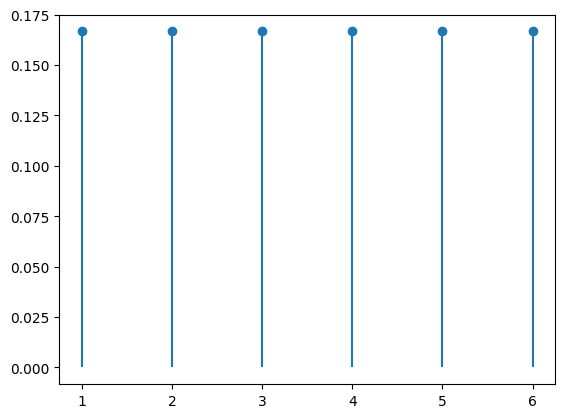

In [147]:
# 離散型確率分布
x = np.arange(1, 7)
y = stats.randint(1, 7).pmf(x)
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

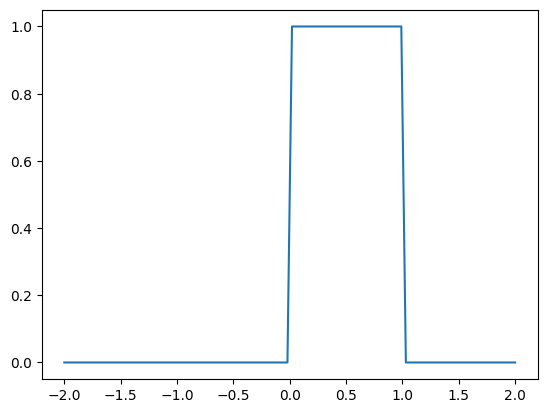

In [152]:
# 連続型確率分布
x = np.linspace(-2, 2, 100)
y = stats.uniform(loc=0, scale=1).pdf(x)
plt.plot(x, y)

## CDF

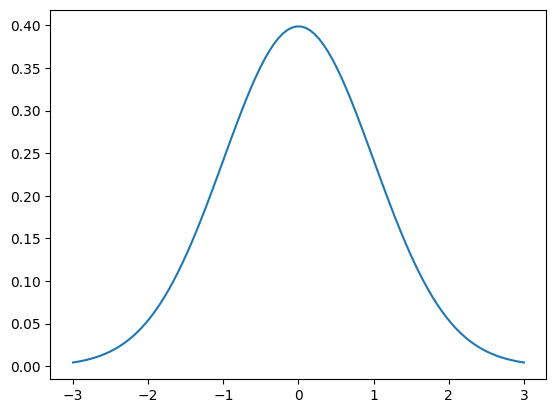

In [178]:
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x)
plt.plot(x, y)

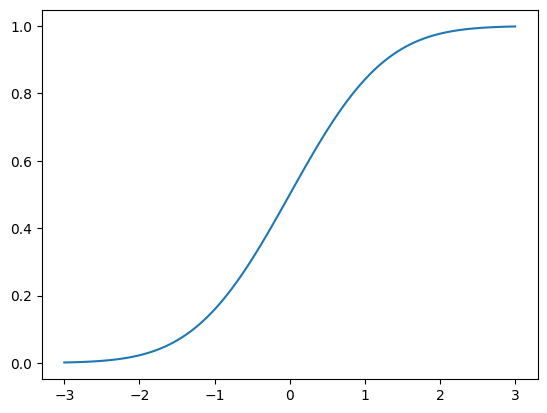

In [179]:
# 正規分布のCDF
y = stats.norm.cdf(x)
plt.plot(x, y)

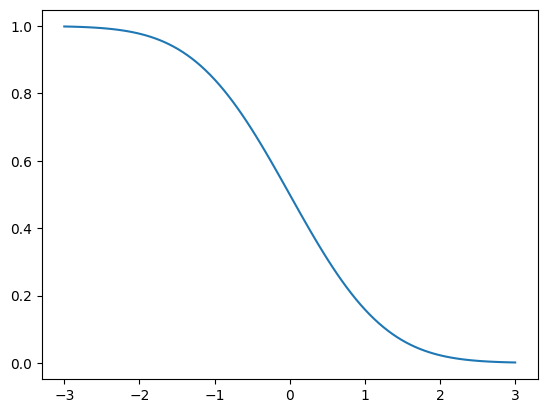

In [180]:
# survival function(sf) =  cdf - 1
y = stats.norm.sf(x)
plt.plot(x, y)

## 正規分布

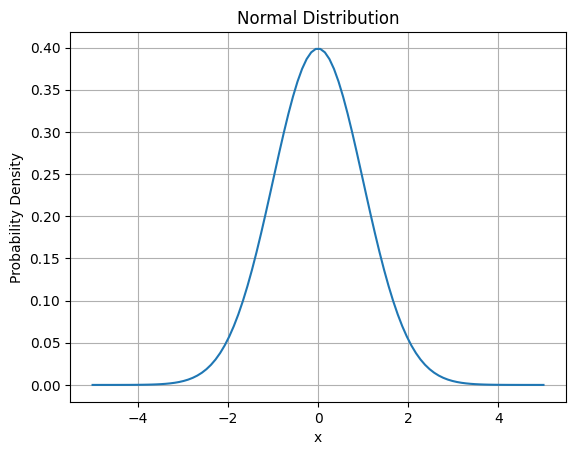

In [195]:
# データの設定
mu = 0        # 平均値
sigma = 1     # 標準偏差
x = np.linspace(-5, 5, 100)  # -5から5までの範囲で100点を生成

# 正規分布の確率密度関数を使ってyの値を生成
y = (1 / (np.sqrt(2 * np.pi * sigma**2))) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# グラフの描画
plt.plot(x, y)
plt.title('Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()


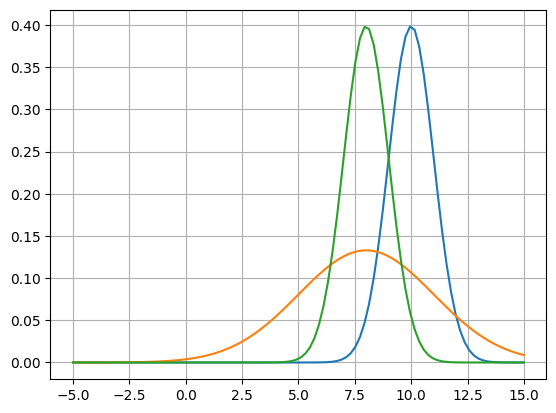

In [211]:
# さまざまな正規分布を描画
x = np.linspace(-5, 15, 100)
y = stats.norm(loc=10, scale=1).pdf(x)
y2 = stats.norm(loc=8, scale=3).pdf(x)
y3 = stats.norm(loc=8, scale=1).pdf(x)

plt.grid(True)
plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)

## KDE

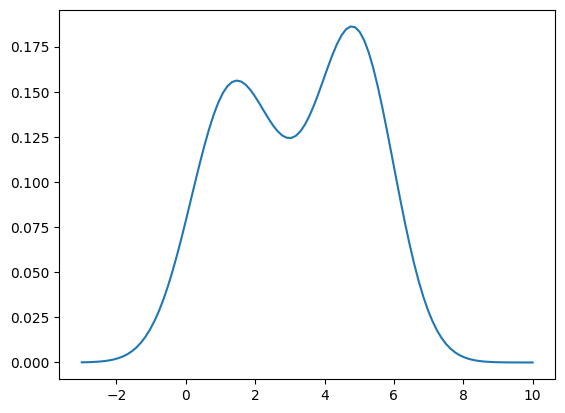

In [227]:
# tipカラムの確率分布をKDEで推定する
x = np.linspace(-3, 10, 100)
y = stats.gaussian_kde([1, 1, 1, 1, 2, 2, 3, 4, 5, 5, 5, 5, 5, 5]).pdf(x)
plt.plot(x, y)

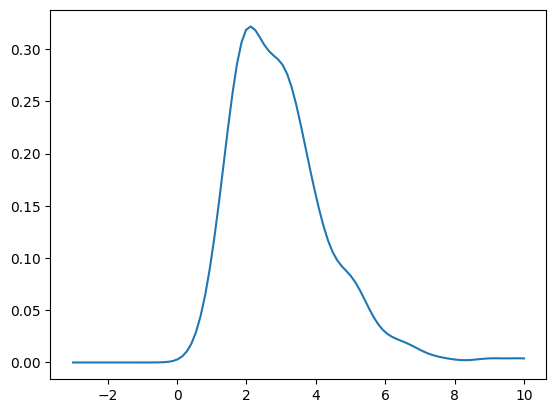

In [213]:
# tipカラムの確率分布をKDEで推定する
x = np.linspace(-3, 10, 100)
y = stats.gaussian_kde(df['tip']).pdf(x)
plt.plot(x, y)

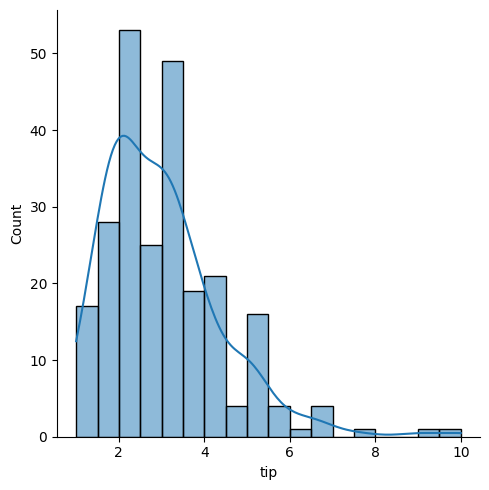

In [228]:
# .displotのkdeをTrueにするとKDEの結果を描画する
sns.displot(df['tip'], kde=True)

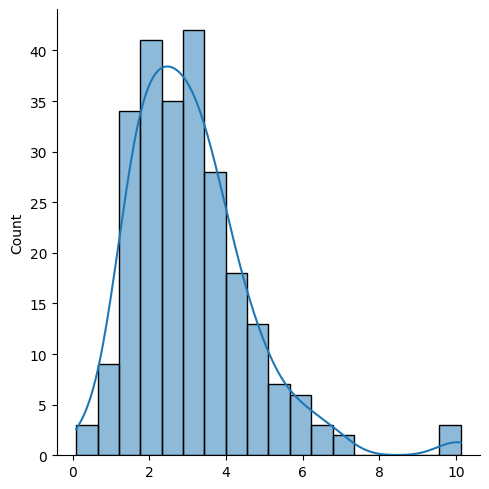

In [268]:
# KDEした結果の確率分布からresample(再度データを抽出)することができる
resample_data = stats.gaussian_kde(df['tip']).resample()

#　シリーズに変換
resample_series = pd.Series(resample_data[0])
#　データフレームに変換
resample_df = pd.DataFrame(resample_data, index=['tip']).T

sns.displot(resample_series, kde=True)

## 68-95-99.7ルール

In [316]:
# 68-95-99.7ルールを確認
group1 = []
group2 = []
group3 = []
samples = []
loc = 5
scale = 1

for i in range(1000):
    sample = stats.norm(loc=loc, scale=scale).rvs()
    if loc-scale < sample < loc+scale:
        group1.append(sample)
    elif loc-2*scale < sample < loc+2*scale:
        group2.append(sample)
    elif loc-3*scale < sample < loc+3*scale:
        group3.append(sample)
    samples.append(sample)

In [317]:
print(len(group1)/len(samples))
print((len(group1) + len(group2))/len(samples))
print((len(group1) + len(group2) + len(group3))/len(samples))

0.668
0.962
0.997


In [51]:
# 平均値と標準偏差を0と1として設定
mu, sigma = 0, 1

# ±1, ±2, ±3標準偏差の確率を計算
prob_1sd = stats.norm(mu, sigma).cdf(1*sigma) - stats.norm(mu, sigma).cdf(-1*sigma)
prob_2sd = stats.norm(mu, sigma).cdf(2*sigma) - stats.norm(mu, sigma).cdf(-2*sigma)
prob_3sd = stats.norm(mu, sigma).cdf(3*sigma) - stats.norm(mu, sigma).cdf(-3*sigma)

print(f"±1標準偏差の確率: {prob_1sd*100:.2f}%")
print(f"±2標準偏差の確率: {prob_2sd*100:.2f}%")
print(f"±3標準偏差の確率: {prob_3sd*100:.2f}%")

±1標準偏差の確率: 68.27%
±2標準偏差の確率: 95.45%
±3標準偏差の確率: 99.73%


## 標準化

In [67]:
x = df['tip_rate']

mean = x.mean()
std = x.std(ddof=0)

z = (x - mean) / std
z

0     -1.663018
1     -0.004282
2      0.094915
3     -0.344926
4     -0.229625
         ...   
239    0.707573
240   -1.431066
241   -1.190876
242   -1.027096
243   -0.017362
Name: tip_rate, Length: 244, dtype: float64

In [96]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df['tip_rate'].values.reshape(-1, 1))
scaled

array([[-1.66301817e+00],
       [-4.28234299e-03],
       [ 9.49146717e-02],
       [-3.44925940e-01],
       [-2.29624968e-01],
       [ 4.17363756e-01],
       [ 1.10337948e+00],
       [-7.33936144e-01],
       [-5.00163567e-01],
       [ 9.47315739e-01],
       [ 9.35535257e-02],
       [-3.11727577e-01],
       [-9.67838090e-01],
       [ 3.24134057e-02],
       [ 7.02885077e-01],
       [ 3.42053237e-01],
       [ 1.41511894e-02],
       [ 1.09840651e+00],
       [ 7.45627991e-01],
       [ 2.33813456e-02],
       [ 1.09728238e+00],
       [-4.14587519e-01],
       [-3.18225155e-01],
       [ 5.16606793e-01],
       [-5.88357399e-03],
       [-4.82644844e-01],
       [-1.83995336e-01],
       [-5.24746516e-02],
       [ 6.12895542e-01],
       [-1.33408300e-01],
       [-1.47179215e-01],
       [-4.03019490e-01],
       [ 6.30066304e-01],
       [-6.95488521e-01],
       [ 3.79214012e-01],
       [-1.83383264e-01],
       [-6.26420825e-01],
       [ 3.36888626e-01],
       [-6.1

In [97]:
# 偏差値
T_score = scaled * 10 + 50
T_score

array([[ 33.36981828],
       [ 49.95717657],
       [ 50.94914672],
       [ 46.5507406 ],
       [ 47.70375032],
       [ 54.17363756],
       [ 61.03379478],
       [ 42.66063856],
       [ 44.99836433],
       [ 59.47315739],
       [ 50.93553526],
       [ 46.88272423],
       [ 40.3216191 ],
       [ 50.32413406],
       [ 57.02885077],
       [ 53.42053237],
       [ 50.14151189],
       [ 60.98406513],
       [ 57.45627991],
       [ 50.23381346],
       [ 60.97282376],
       [ 45.85412481],
       [ 46.81774845],
       [ 55.16606793],
       [ 49.94116426],
       [ 45.17355156],
       [ 48.16004664],
       [ 49.47525348],
       [ 56.12895542],
       [ 48.665917  ],
       [ 48.52820785],
       [ 45.9698051 ],
       [ 56.30066304],
       [ 43.04511479],
       [ 53.79214012],
       [ 48.16616736],
       [ 43.73579175],
       [ 53.36888626],
       [ 43.8951679 ],
       [ 49.8515239 ],
       [ 46.52948726],
       [ 47.48515471],
       [ 59.63290777],
       [ 45

## 二項分布
- ある試行を複数回行ったときに, ある事象が起こる確率が従う確率分布
- ｎ回の試行で確率pの事象が何回起こるかの分布

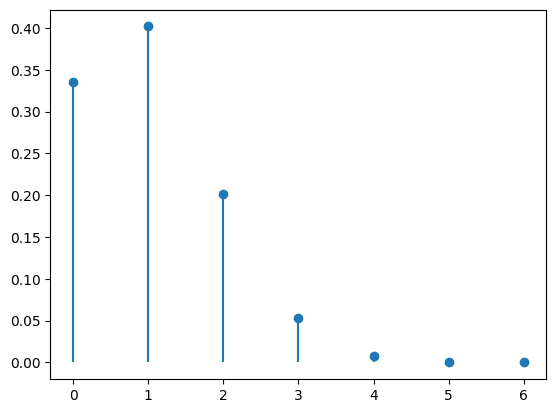

In [84]:
n = 6
x = np.arange(n+1)
y = stats.binom(n=n, p=1/6).pmf(x)
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

## 二項分布->正規分布

平均np 分散npqの正規分布に近似できる

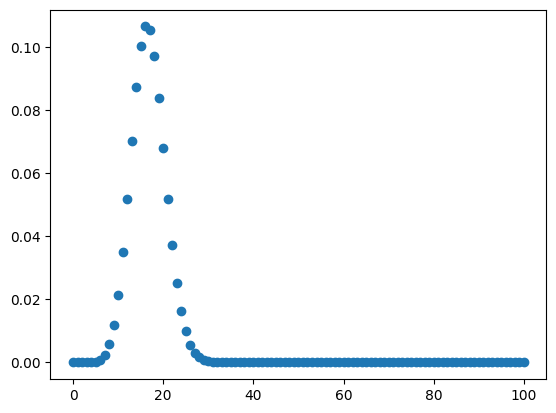

In [76]:
n = 100
p = 1/6
x = np.arange(n+1)
y = stats.binom(n, p).pmf(x)
plt.plot(x, y, 'o')

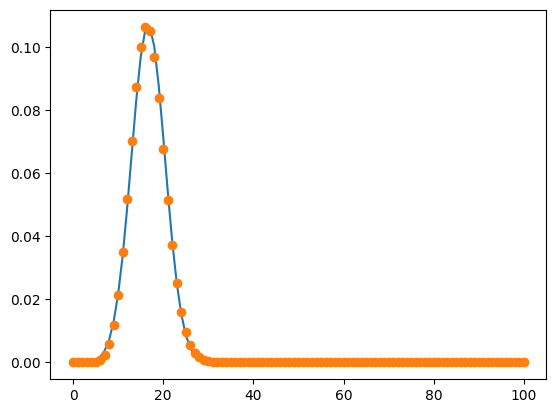

In [77]:
# 平均np 分散npqの正規分布
y2 = stats.norm(n*p, np.sqrt(n*p*(1-p))).pdf(x)
plt.plot(x, y2)
plt.plot(x, y, 'o')

In [78]:
# 平均=np
stats.binom(n, p).mean()

16.666666666666664

In [79]:
n*p

16.666666666666664

In [80]:
# 分散=np(1-p)
stats.binom(n, p).var()

13.888888888888888

In [81]:
n*p*(1-p)

13.888888888888888

## 標本分布

In [326]:
#データセットを母集団とみなして、n個のサンプルをm回取得し、それぞれの平均値を求める
m = 10000
n = 50
column = 'tip'
sample_means = []
for i in range(m):
    sampled_df = df.sample(n) #dfからn個のサンプルを取得
    sample_mean = sampled_df[column].mean()
    sample_means.append(sample_mean)

In [327]:
# 標本平均
np.mean(sample_means)

2.99835396

In [328]:
# 母平均
df[column].mean()

2.99827868852459

In [329]:
# 標本分散 (実際には不偏分散stats.tvar()を使った方が良い)
# 外れ値の影響で母分散と差が出てしまう
np.var(sample_means)

0.0298401325923184

In [330]:
# 母分散/n
np.var(df[column])/n

0.038132170249932824

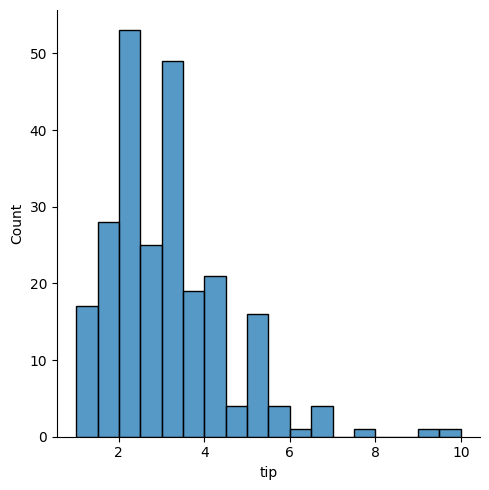

In [331]:
# 母集団の分布
sns.displot(df[column])

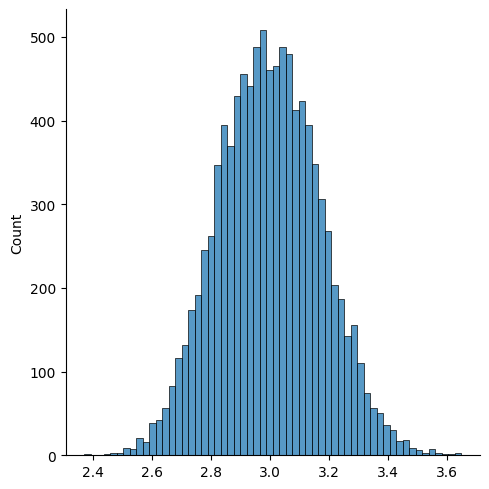

In [332]:
# 無限回やると平均の標本分布(平均=母平均, 分散=母分散/n)になる
sns.displot(sample_means)

In [311]:
sample_means

[2.8798000000000004,
 2.9632000000000005,
 3.2832,
 2.9972000000000003,
 3.2103999999999995,
 3.2912,
 2.6534000000000004,
 2.8962,
 3.0,
 3.1047999999999996,
 2.6854,
 2.9042000000000003,
 2.8322,
 3.0372000000000003,
 2.681,
 3.4146000000000005,
 3.1398,
 2.9452000000000003,
 2.8613999999999997,
 2.9863999999999997,
 2.8253999999999997,
 3.343,
 3.2088,
 2.7963999999999998,
 3.1302,
 3.1390000000000002,
 3.1179999999999994,
 3.0684000000000005,
 2.9322,
 2.7203999999999997,
 2.8832,
 2.9539999999999997,
 3.0782,
 3.3744,
 2.8636,
 2.9529999999999994,
 3.0214,
 2.8198000000000003,
 3.1226,
 2.9756,
 2.9320000000000004,
 3.1223999999999994,
 3.2409999999999997,
 3.0669999999999997,
 3.2862,
 3.3276000000000003,
 2.9863999999999997,
 3.1334000000000004,
 2.7976,
 3.0386,
 2.8086,
 3.0388,
 3.1038,
 2.5152,
 3.0508000000000006,
 2.7984000000000004,
 2.7821999999999996,
 3.1974,
 2.9554,
 3.0768,
 2.9097999999999997,
 3.2958000000000003,
 2.8697999999999997,
 3.0944,
 2.7498,
 2.880799999

## 不偏分散

In [333]:
#不偏分散
stats.tvar(df['tip'])

1.914454638062471

In [335]:
np.var(df['tip'], ddof=1)

1.914454638062471

In [336]:
# 不偏分散の平方根
np.sqrt(stats.tvar(df['tip']))

1.3836381890011822

In [337]:
stats.tstd(df['tip'])

1.3836381890011822

In [340]:
np.std(df['tip'], ddof=1)

1.3836381890011822

## 不偏分散の不偏性

In [347]:
m = 1000
n = 50
column = 'tip'
sample_vars = []
sample_uvars = []
for i in range(m):
    sample_df = df.sample(n) # 標本をランダムに抽出
    sample_var = np.var(sample_df[column]) # 標本分散
    sample_uvar = stats.tvar(sample_df[column]) # 不偏分散
    sample_vars.append(sample_var) # 標本分散をリストに追加
    sample_uvars.append(sample_uvar) # 不偏分散をリストに追加

In [348]:
# 標本の不偏分散の平均
np.mean(sample_uvars)

1.9030919025714286

In [349]:
# 母分散
np.var(df[column])

1.9066085124966412

In [350]:
# 標本の分散の平均
np.mean(sample_vars)

1.86503006452

## 比率の区間推定

- 比率の標本分布を標準化し、標準正規分布を計算し、95%信頼区間となる値を算出する

In [387]:
stats.binom.interval(0.95, 1000, 0.6) # 二項分布の区間推定

(570.0, 630.0)

In [366]:
stats.binom.interval(0.99, 1000, 0.6) # 二項分布の区間推定

(560.0, 640.0)

In [391]:
# データセットを母集団とみなして、何回正しく推定できるかを確認する
n = 50
m = 100
alpha = 0.95
population_male_ratio = len(df[df['sex']=='Male']) / len(df) # 母集団の男性の割合
for _ in range(m):
    sample_df = df.sample(n) # 標本をランダムに抽出
    male_ratio = len(sample_df[sample_df['sex']=='Male'])/len(sample_df) # 標本の男性の割合
    min_num, max_num = stats.binom.interval(alpha, n=n, p=male_ratio) # 信頼区間を計算
    min_ratio = min_num / n # 信頼区間の下限
    max_ratio = max_num / n # 信頼区間の上限
    correct = min_ratio < population_male_ratio < max_ratio # 母集団の男性の割合が信頼区間に入っているか
    results.append({'min': min_ratio, 'max': max_ratio, 'correct':correct}) # 結果を記録

In [395]:
result_df = pd.DataFrame(results)

In [396]:
# 何回正しく推定できたかを確認する
result_df['correct'].value_counts()

correct
True     94
False     6
Name: count, dtype: int64

## 平均の区間推定

In [403]:
column = 'tip'
alpha = 0.95
n = 50
m = 100
population_mean = df[column].mean() # 母平均
results = []
for _ in range(m):
    sample_df = df.sample(n) # 標本抽出
    sample_mean = sample_df[column].mean() # 標本平均
    sample_var = stats.tvar(sample_df[column]) # 標本分散
    min_val, max_val = stats.norm.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n)) # 信頼区間を計算
    correct = min_val < population_mean < max_val # 母平均が信頼区間に含まれるか
    results.append({'min': min_val, 'max': max_val, 'correct': correct}) # 結果を格納

In [404]:
result_df = pd.DataFrame(results)

In [405]:
result_df['correct'].value_counts()

correct
True     95
False     5
Name: count, dtype: int64

## t分布

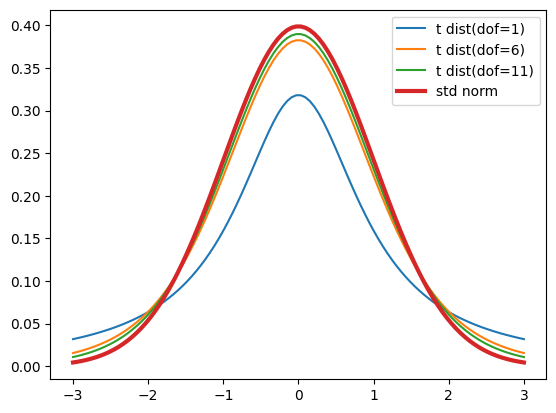

In [426]:
# 標準正規分布とt分布の比較
x = np.linspace(-3, 3, 100)
z = stats.norm.pdf(x)
for dof in range(1, 12, 5):
    t = stats.t(dof).pdf(x)
    plt.plot(x, t, label=f"t dist(dof={dof})")
plt.plot(x, z, label="std norm", linewidth=3)
plt.legend()

## 平均の区間推定(正規分布 vs t分布)

In [435]:
column = 'tip'
alpha = 0.95
n = 50
population_mean = df[column].mean() # 母平均

sample_df = df.sample(n) # 標本抽出
sample_mean = sample_df[column].mean() # 標本平均
sample_var = stats.tvar(sample_df[column]) # 標本分散
min_val_norm, max_val_norm = stats.norm.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n)) # 正規分布
min_val_t, max_val_t = stats.t.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n), df=n-1) # t分布

In [417]:
# 正規分布の結果
print(min_val_norm, max_val_norm)

2.501018110138121 3.2125818898618794


In [418]:
# t分布の結果
print(min_val_t, max_val_t)

2.492012442480681 3.2215875575193196


In [440]:
# 標準誤差
sample_df[column].sem()

0.14534469936207878

In [441]:
# 標準誤差
np.sqrt(sample_var/n)

0.14534469936207878

#### めも

In [456]:
# 累積分布関数の逆関数です。指定した確率に対応する確率変数の値を求めます。
stats.t.ppf(0.975, 1000)

1.9623390808264074

## 比率の差の検定(Z-test)

#### 比率の差の標本分布の標準化
- 2つの確率変数の差の平均値はそれぞれの平均の差
- 独立な二つの確率変数の分散はそれぞれの分散の和

In [463]:
proportions_ztest([30, 33], [1000, 1000], alternative='smaller')

(-0.3840618481549573, 0.35046630388746547)

In [472]:
proportions_ztest([30, 33], [1000, 1000], alternative='larger')

(-0.3840618481549573, 0.6495336961125345)

In [476]:
# 検証したいデータ：30人が成功したグループA（サンプルサイズ1000）、33人が成功したグループB（サンプルサイズ1000）
count = [30, 33]
nobs = [1000, 1000]

# 一方の比率が他方より「小さい」かどうかを検証
stat, pval = proportions_ztest(count, nobs, alternative='smaller')

# 結果をプリント
print(f"Z統計量: {stat}")
print(f"p値: {pval}")

# 有意水準を0.05とした場合の判断
if pval < 0.05:
    print("p値が0.05より小さいため、帰無仮説を棄却します。グループAの成功率はグループBよりも統計的に有意に小さいと言えます。")
else:
    print("p値が0.05以上であるため、帰無仮説を棄却できません。グループAとグループBの成功率に統計的に有意な差は見られません。")


Z統計量: -0.3840618481549573
p値: 0.35046630388746547
p値が0.05以上であるため、帰無仮説を棄却できません。グループAとグループBの成功率に統計的に有意な差は見られません。


#### p値
- 帰無仮説が正しいとしたときにその検定統計量が得られる確率
- Z = -0.38　の p値は p = 0.35
- 帰無仮説が正しい時35%の確率でこの結果は起こりうる

## 連関の検定

#### χ2値が、χ2分布でどれぐらいの確率で得られるかを計算する

In [474]:
obs = [[15, 5] ,[15, 65]]
stats.chi2_contingency(obs, correction=False)

Chi2ContingencyResult(statistic=24.107142857142858, pvalue=9.112167294252327e-07, dof=1, expected_freq=array([[ 6., 14.],
       [24., 56.]]))

In [479]:
# GPT4
obs = [[15, 5] ,[15, 65]]

chi2, p, dof, expected = stats.chi2_contingency(obs, correction=False)

print("カイ二乗値: ", chi2)
print("p値: ", p)
print("自由度: ", dof)
print("期待度数: \n", expected)

# p値に基づく解釈
alpha = 0.05
if p < alpha:
    print("2つのカテゴリ変数は独立ではないと結論されます（有意水準 {}）。".format(alpha))
else:
    print("2つのカテゴリ変数は独立と結論されます（有意水準 {}）。".format(alpha))


カイ二乗値:  24.107142857142858
p値:  9.112167294252327e-07
自由度:  1
期待度数: 
 [[ 6. 14.]
 [24. 56.]]
2つのカテゴリ変数は独立ではないと結論されます（有意水準 0.05）。


## Z検定とカイ二乗検定の比較

#### 同じことをしている
- カイ二乗検定の場合は、対立仮説が”比率差なし”しかできない

In [490]:
n = 50
sample_df1 = df.sample(n)
sample_df2 = df.sample(n)

In [491]:
count1 = sample_df1['time'].value_counts()['Dinner']
count2 = sample_df2['time'].value_counts()['Dinner']

In [492]:
# Z検定
proportions_ztest([count1, count2], [n, n], alternative='two-sided')

(0.6486581250966152, 0.5165593764787644)

In [493]:
sample1_freq = sample_df1['time'].value_counts().values
sample2_freq = sample_df2['time'].value_counts().values

In [494]:
# カイ二乗検定
stats.chi2_contingency([sample1_freq, sample2_freq], correction=False)

Chi2ContingencyResult(statistic=0.42075736325385693, pvalue=0.5165593764787638, dof=1, expected_freq=array([[34.5, 15.5],
       [34.5, 15.5]]))

## 平均値差の検定(t検定)

#### スチューデントのt検定
- 標本が小さい場合、母集団が正規分布でかつ２群の分散が等しい場合に限り、統計検定量はt分布になる(平均の差の分布を正規分布で近似できない)
- 母分散は未知だが、推定可能
- 標本分布を標準化するとt分布となる

#### ウェルチのt検定
- ２群の分散が等しいとは言えない場合
- 等分散性をいう必要がなく、大標本であればZ検定に近似できるためpythonでは最初に行うのがおすすめ

In [4]:
male_tips = df[df['sex']=='Male']['tip_rate']
female_tips = df[df['sex']=='Female']['tip_rate']

In [5]:
# 標本分散
print(np.var(male_tips), np.var(female_tips))

0.004169445577529409 0.00284330042554882


In [6]:
# 標本平均
print(np.mean(male_tips), np.mean(female_tips))

0.15765054700429743 0.16649073632892478


In [7]:
# スチューデントのt検定
stats.ttest_ind(male_tips, female_tips)

Ttest_indResult(statistic=-1.0833972270477996, pvalue=0.27971038496054884)

In [8]:
# ウェルチのt検定
stats.ttest_ind(male_tips, female_tips, equal_var=False)

Ttest_indResult(statistic=-1.1432770167349968, pvalue=0.25424561889275826)

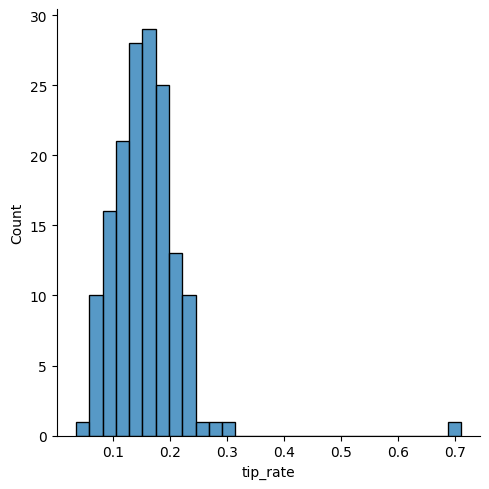

In [9]:
# 男性のtipの分布
sns.displot(male_tips)

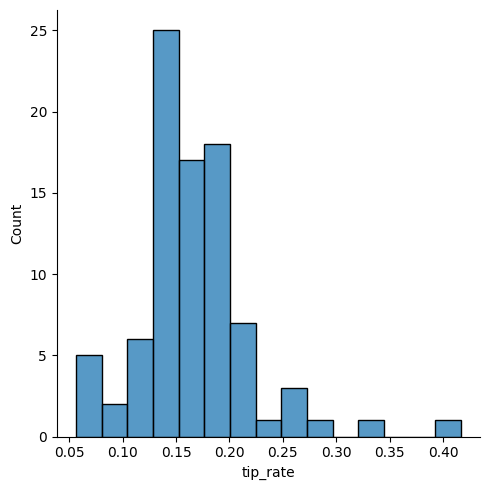

In [10]:
# 女性のtipの分布
sns.displot(female_tips)

<Axes: xlabel='sex', ylabel='tip_rate'>

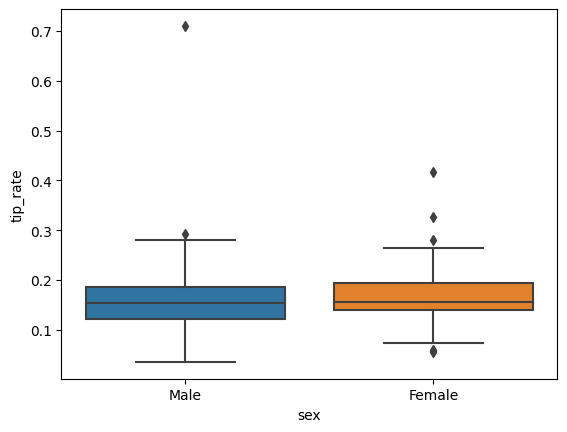

In [11]:
sns.boxplot(data=df, x='sex', y='tip_rate')

## 正規性と等分散性の検定

## QQプロット
- 得られたデータが理論上の分布(例えば正規分布)にどれぐらい近しいかを視覚的に確認できる
- 点が直線に近ければ観測データは理論分布に近い

In [12]:
male_tipr = df[df['sex']=='Male']['tip_rate']
female_tipr = df[df['sex']=='Female']['tip_rate']

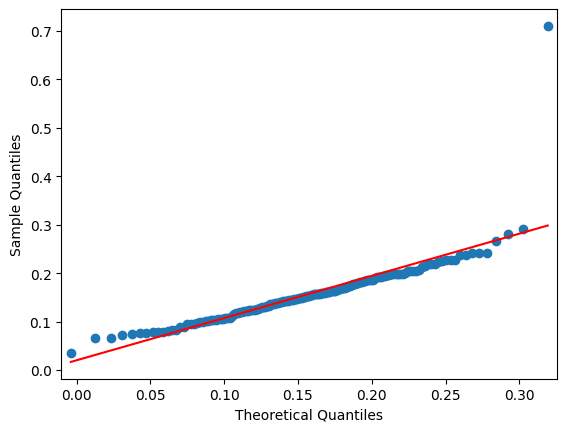

In [13]:
# 男性のtipのQQプロット
fig = qqplot(male_tipr,
             line='r',
             dist=stats.norm(loc=np.mean(male_tipr), scale=np.sqrt(stats.tvar(male_tipr))))

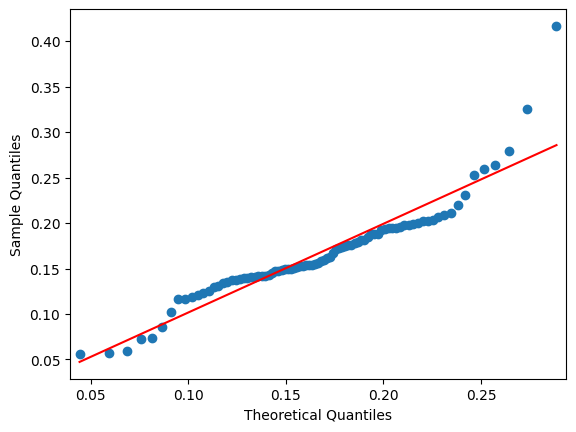

In [14]:
# 女性のtipのQQプロット
fig = qqplot(female_tipr,
             line='r',
             dist=stats.norm(loc=np.mean(female_tipr), scale=np.sqrt(stats.tvar(female_tipr))))

## シャピロウィルクの検定
- 正規性の検定
- QQプロットにおいて、どれくらい直線からずれているかを検定する
- 標本の順序統計量(小さいものから並べた)と正規分布の順序統計量の期待値の相関を検定統計量にする

In [18]:
W, p = stats.shapiro(male_tipr)

# 結果の解釈
if p > 0.05:
    print(f"データは正規分布に従っていると見られます（W={W}, p={p}）")
else:
    print(f"データは正規分布に従っていないと見られます（W={W}, p={p}）")

データは正規分布に従っていないと見られます（W=0.7447848916053772, p=3.2243768151486588e-15）


In [15]:
stats.shapiro(male_tipr)

ShapiroResult(statistic=0.7447848916053772, pvalue=3.2243768151486588e-15)

In [16]:
stats.shapiro(female_tipr)

ShapiroResult(statistic=0.8982975482940674, pvalue=4.718069249065593e-06)

In [19]:
# 外れ値を除く
stats.shapiro(np.sort(male_tipr)[:-1])

ShapiroResult(statistic=0.9931070804595947, pvalue=0.6644759774208069)

In [20]:
# 外れ値を除く
stats.shapiro(np.sort(female_tipr)[:-2])

ShapiroResult(statistic=0.9696651697158813, pvalue=0.04252713546156883)

## F分布
- F分布はχ2を使って表せる
- 母集団が正規分布であることを仮定している
- 自由度が2つある

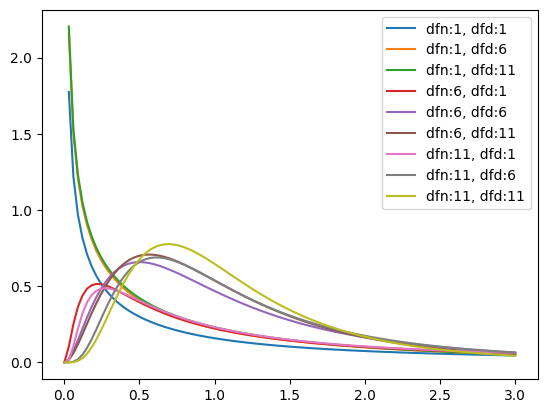

In [21]:
# dfn: 分子の自由度
# dfd: 分母の自由度
x = np.linspace(0, 3, 100)
for dfn in range(1, 12, 5):
    for dfd in range(1, 12, 5):
        y = stats.f.pdf(x, dfn=dfn, dfd=dfd)
        plt.plot(x, y, label=f'dfn:{dfn}, dfd:{dfd}')
plt.legend()

## F検定
- 等分散性の検定
- 2群の等分散性の検定には、(不偏)分散の比率を検定統計量に使う

In [22]:
male_tipr = df[df['sex']=='Male']['tip_rate']
female_tipr = df[df['sex']=='Female']['tip_rate']

In [23]:
# 標本分散(差がありそう？)
print(np.var(male_tipr), np.var(female_tipr))

0.004169445577529409 0.00284330042554882


In [24]:
# F値計算
n1 = len(male_tipr)
n2 = len(female_tipr)
dfn = n1 - 1 # 分子の自由度
dfd = n2 - 1 # 分母の自由度
var1 = stats.tvar(male_tipr) # 分子の分散
var2 = stats.tvar(female_tipr) # 分母の分散
f = var1/var2
print(f)

1.4588472200534603


In [27]:
# p値計算(分散に差がないとは言えない)
stats.f(dfn=dfn, dfd=dfd).sf(f)

0.02710086345437418

## 対応ありの平均値差の検定
- 個々の差(変化量)の平均を検定統計量とする

In [38]:
import os
import numpy as np
import pandas as pd
import tkinter as tk
import openpyxl
from tkinter import filedialog
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import Alignment
from openpyxl.worksheet.table import Table, TableStyleInfo

# シートネームがない時の辞書
# ユニークな値を出すときNaNもカウントする
# 自動収集できるような関数を作成する

# csv読み込み時にstrで読み込みたい辞書
kw_dtype = {
    "品番": str,
    "図番": str,
    "元品番": str,
    "先品番": str,
}

kw_encoding = None


def _tk_instance():
    """tkinterのインスタンスを作成し、rootを返します。"""

    root = tk.Tk()
    root.withdraw()

    # topmost指定
    root.attributes("-topmost", True)
    root.withdraw()
    root.lift()
    root.focus_force()

    return root


def get_file_path(file_type=None):
    """
    ファイル選択ダイアログを表示し、ユーザーが選択したファイルのパスを取得します。

    Args:
        file_type (str, optional): 選択可能なファイルの種類。例えば、"txt"を指定すると.txtファイルのみが選択可能になります。
        file_typeがNoneまたは指定されていない場合、全ての種類のファイルが選択可能になります。

    Returns:
        str or None: ユーザーが選択したファイルのパス。ファイルが選択されなかった場合はNoneを返します。
    """

    _tk_instance()

    # ファイル選択ダイアログを表示し、選択したファイルのパスを取得
    if file_type:
        filetypes = ((file_type, f"*.{file_type}"),)
    else:
        filetypes = (("All files", "*.*"),)

    file_path = filedialog.askopenfilename(
        initialdir="..", title="Select file", filetypes=filetypes
    )

    # ファイルが選択されていない場合はNoneを返す
    if not file_path:
        print("ファイルが選択されていません")
        return None

    return file_path

In [40]:
file_path = get_file_path(file_type=None)
bp_df = pd.read_csv(file_path)

In [42]:
bp_df

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


In [41]:
stats.ttest_rel(bp_df['bp_before'], bp_df['bp_after'], alternative='greater')

TtestResult(statistic=3.3371870510833657, pvalue=0.0005648957322420411, df=119)

In [43]:
# 標本平均
bp_df['bp_before'].mean()

156.45

In [44]:
# 変化量
bp_df['delta'] = bp_df['bp_before'] - bp_df['bp_after']

In [45]:
# 変化量の平均
bp_df['delta'].mean()

5.091666666666667

<Axes: xlabel='delta'>

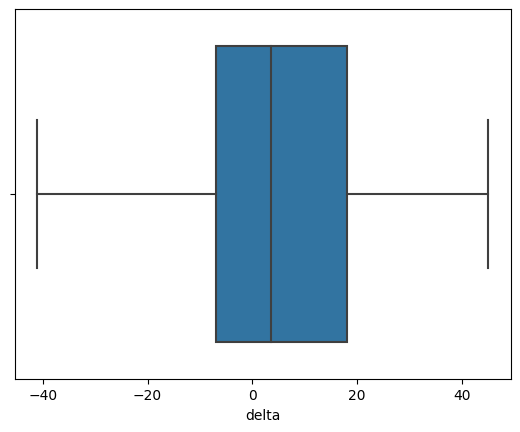

In [46]:
# 変化量の分布
sns.boxplot(x=bp_df['delta'])

## 検定力
- 検定力が0.8となるようにサンプルサイズを決定する
- 検定力に影響を与える3つの要素
- 有意水準
- サンプルサイズ あげすぎると微小な差を有意差ありと判定してしまう
- 帰無分布と対立分布の差

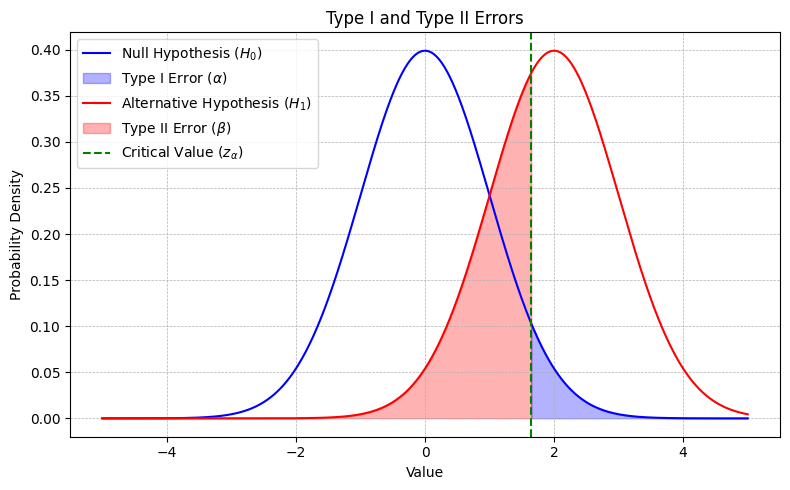

In [55]:
# 検定力の図示
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 5))

# Parameters
mu0 = 0
mu1 = 2
sigma = 1
alpha = 0.05
z_alpha = stats.norm.ppf(1 - alpha, mu0, sigma)
beta = stats.norm.cdf(z_alpha, mu1, sigma)

# Plot the null hypothesis distribution
x = np.linspace(-5, 5, 1000)
y0 = stats.norm.pdf(x, mu0, sigma)
ax.plot(x, y0, label='Null Hypothesis ($H_0$)', color='blue')

# Shade the alpha region
x_alpha = np.linspace(z_alpha, 5, 100)
y_alpha = stats.norm.pdf(x_alpha, mu0, sigma)
ax.fill_between(x_alpha, y_alpha, color='blue', alpha=0.3, label=r'Type I Error ($\alpha$)')

# Plot the alternative hypothesis distribution
y1 = stats.norm.pdf(x, mu1, sigma)
ax.plot(x, y1, label='Alternative Hypothesis ($H_1$)', color='red')

# Shade the beta region
x_beta = np.linspace(-5, z_alpha, 100)
y_beta = stats.norm.pdf(x_beta, mu1, sigma)
ax.fill_between(x_beta, y_beta, color='red', alpha=0.3, label=r'Type II Error ($\beta$)')

# Annotations and labels
ax.axvline(z_alpha, color='green', linestyle='--', label=r'Critical Value ($z_{\alpha}$)')
ax.legend()
ax.set_title('Type I and Type II Errors')
ax.set_xlabel('Value')
ax.set_ylabel('Probability Density')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

## Cohen's d
- 標本から計算する標準化された効果量の指標

In [56]:
def cohen_d(x1, x2):
    n1 = len(x1)
    n2 = len(x2)
    dof = n1 + n2 - 2
    std = np.sqrt(((n1-1)*stats.tvar(x1) + (n2-1)*stats.tvar(x2))/dof)
    return np.abs((np.mean(x1) - np.mean(x2)))/std

In [57]:
male_tip_rate = df[df['sex']=='Male']['tip_rate']
female_tip_rate = df[df['sex']=='Female']['tip_rate']

In [58]:
cohen_d(male_tip_rate, female_tip_rate)

0.14480153987269387

## 検定力分析
- 有意水準, 効果量, 検定力, サンプルサイズを残りの値から算出する

In [59]:
# インスタンス生成
power = TTestIndPower()

In [60]:
male_tip_rate = df[df['sex']=='Male']['tip_rate']
female_tip_rate = df[df['sex']=='Female']['tip_rate']

In [61]:
# t検定の結果
stats.ttest_ind(male_tip_rate, female_tip_rate, equal_var=False)

Ttest_indResult(statistic=-1.1432770167349968, pvalue=0.25424561889275826)

In [62]:
effect_size = cohen_d(male_tip_rate, female_tip_rate)
n1 = len(male_tip_rate)
n2 = len(female_tip_rate)
# 検定力を求める
stats_power = power.solve_power(effect_size=effect_size, nobs1=n1, alpha=0.05, power=None, ratio=n2/n1)
stats_power

0.19038260700802495

In [63]:
# 効果量を0.2とした時の検定力0.8に必要な標本1のサイズを求める
power.solve_power(effect_size=0.2, nobs1=None, alpha=0.05, power=0.8, ratio=1)

393.4056989990351

## 検定力の推移

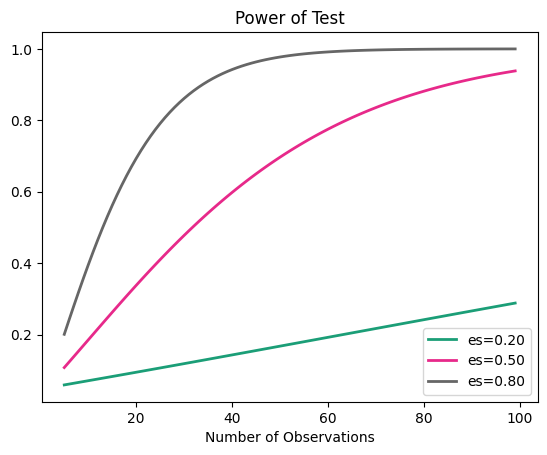

In [64]:
fig = power.plot_power(dep_var='nobs', nobs=np.array(range(5, 100)), effect_size=[0.2, 0.5, 0.8], alpha=0.05)